In [2]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [19]:
project = 'rehersal Models CIFAR10 Task IL'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'learning_rate', 'epochs', 'architecture'], y_min=30)

In [20]:
viz.extract_all_runs_metrics()

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[0]} {uid.split(';')[3]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

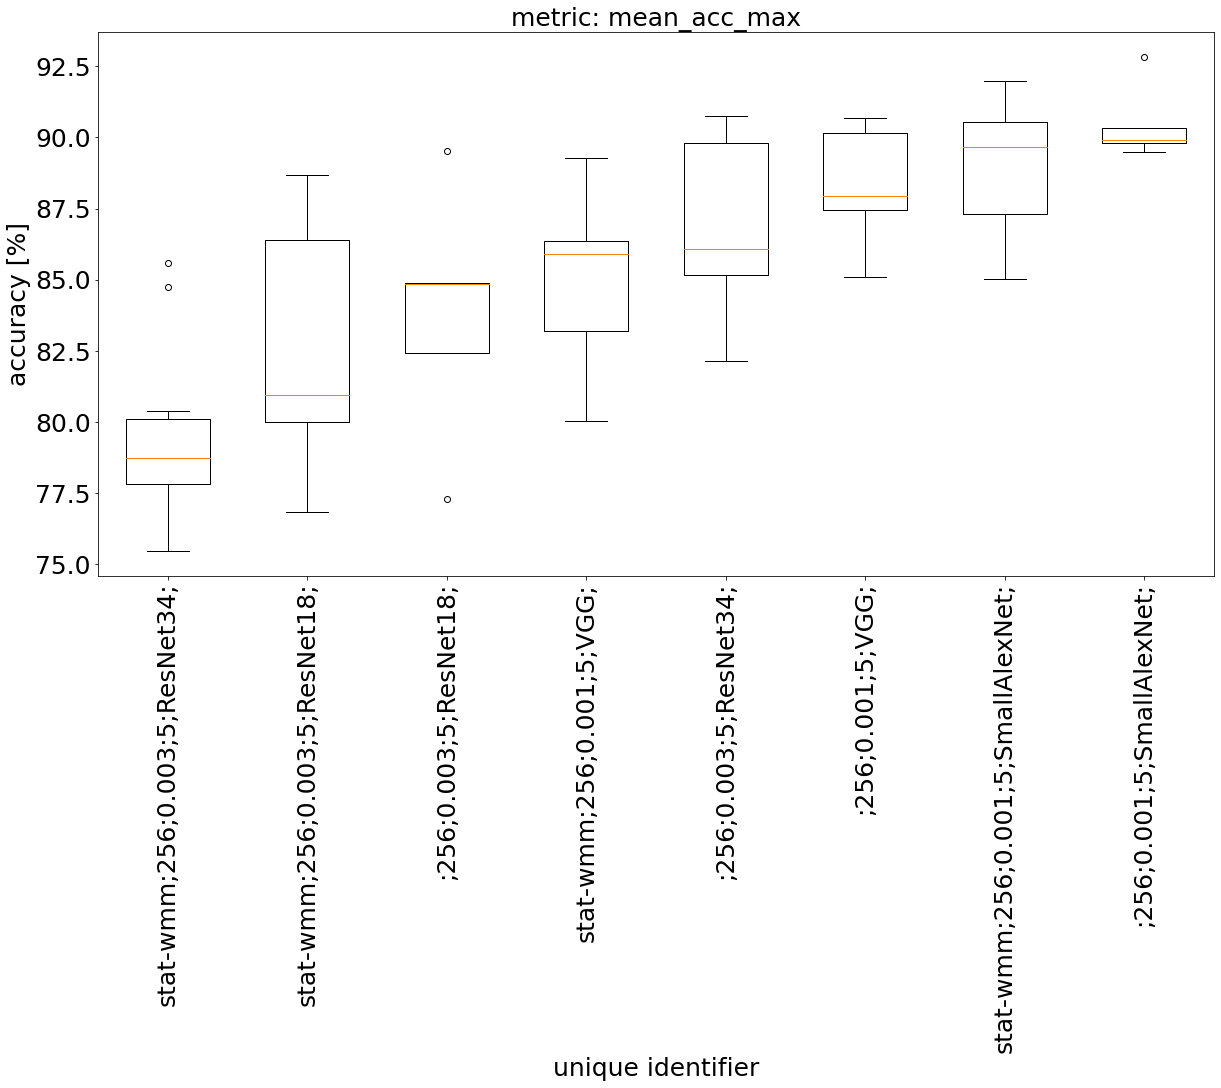

In [28]:
df = viz.metrics_df.copy()


# metric = 'mean_acc_at_the_end'
# metric = 'acc_at_the_end_task_0'
# metric = 'mean_acc_mean_decrease_per_task'
metric = 'mean_acc_max'

# box_plot(metric, df, f"learning_rate_box_dataset_resnet18_no_separate_{metric}", 25)
box_plot(metric, df, None, 25)

# df